<a href="https://colab.research.google.com/github/deadyr/MLWildfirePrediction/blob/main/CNN_ver1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/data/threshh3_8x8.zip' -d '/content'

Streaming af output blev afkortet til de sidste 5000 linjer.
  inflating: /content/threshh3_8x8/tile26_36_var11_sample_95.png  
  inflating: /content/threshh3_8x8/tile18_46_var5_sample_122.png  
  inflating: /content/threshh3_8x8/tile27_25_var19_sample_17.png  
  inflating: /content/threshh3_8x8/tile16_30_var18_sample_81.png  
  inflating: /content/threshh3_8x8/tile20_37_var7_sample_4.png  
  inflating: /content/threshh3_8x8/tile23_25_var9_sample_85.png  
  inflating: /content/threshh3_8x8/tile25_30_var7_sample_30.png  
  inflating: /content/threshh3_8x8/tile28_39_var3_sample_43.png  
  inflating: /content/threshh3_8x8/tile19_25_var25_sample_115.png  
  inflating: /content/threshh3_8x8/tile26_46_burned_area_sample_97.png  
  inflating: /content/threshh3_8x8/tile15_9_var0_sample_31.png  
  inflating: /content/threshh3_8x8/tile30_34_var2_sample_130.png  
  inflating: /content/threshh3_8x8/tile26_47_var7_sample_131.png  
  inflating: /content/threshh3_8x8/tile26_37_var14_sample_64.png  
 

In [3]:
!unzip '/content/drive/MyDrive/data/noburn_8x8.zip' -d '/content'

Streaming af output blev afkortet til de sidste 5000 linjer.
  inflating: /content/noburn_8x8/tile29_56_var19_sample_9.png  
  inflating: /content/noburn_8x8/tile23_18_var15_sample_16.png  
  inflating: /content/noburn_8x8/tile10_53_burned_area_sample_15.png  
  inflating: /content/noburn_8x8/tile26_1_var6_sample_12.png  
  inflating: /content/noburn_8x8/tile6_4_var22_sample_8.png  
  inflating: /content/noburn_8x8/tile26_20_var13_sample_11.png  
  inflating: /content/noburn_8x8/tile11_21_var15_sample_2.png  
  inflating: /content/noburn_8x8/tile27_35_var10_sample_15.png  
  inflating: /content/noburn_8x8/tile13_5_var18_sample_8.png  
  inflating: /content/noburn_8x8/tile23_50_var8_sample_13.png  
  inflating: /content/noburn_8x8/tile5_42_var21_sample_8.png  
  inflating: /content/noburn_8x8/tile11_39_var18_sample_6.png  
  inflating: /content/noburn_8x8/tile27_3_var12_sample_6.png  
  inflating: /content/noburn_8x8/tile19_47_var6_sample_21.png  
  inflating: /content/noburn_8x8/tile23

In [4]:
!unzip '/content/drive/MyDrive/data/months121and128_8x8.zip' -d '/content'

Streaming af output blev afkortet til de sidste 5000 linjer.
  inflating: /content/months121and128_8x8_ex/tile24_19_var0_sample_121.png  
  inflating: /content/months121and128_8x8_ex/tile4_9_var9_sample_121.png  
  inflating: /content/months121and128_8x8_ex/tile20_52_var22_sample_128.png  
  inflating: /content/months121and128_8x8_ex/tile7_41_var3_sample_121.png  
  inflating: /content/__MACOSX/months121and128_8x8_ex/._tile7_41_var3_sample_121.png  
  inflating: /content/months121and128_8x8_ex/tile14_49_burned_area_sample_128.png  
  inflating: /content/months121and128_8x8_ex/tile4_53_var1_sample_121.png  
  inflating: /content/months121and128_8x8_ex/tile9_8_var24_sample_128.png  
  inflating: /content/months121and128_8x8_ex/tile33_46_var18_sample_128.png  
  inflating: /content/__MACOSX/months121and128_8x8_ex/._tile33_46_var18_sample_128.png  
  inflating: /content/months121and128_8x8_ex/tile20_60_var7_sample_128.png  
  inflating: /content/months121and128_8x8_ex/tile13_8_var20_sample

In [5]:
import os
import numpy as np
from PIL import Image

def load_images(images_dirs, num_samples, num_vars, img_shape=(8, 8)):
    X = []
    y = []
    for images_dir in images_dirs:
        for x in range(1, 38):
            for y_index in range(1, 63):
                for i in range(num_samples):
                    # Load target image
                    if i not in [104, 110]:
                        target_img_path = os.path.join(images_dir, f'tile{x}_{y_index}_burned_area_sample_{i}.png')
                        if os.path.exists(target_img_path):
                            target_img = Image.open(target_img_path).convert('L')
                            target_img_array = np.array(target_img) / 255.0
                            y.append(target_img_array)

                            # Load input variable images and stack them
                            stacked_img = np.zeros((img_shape[0], img_shape[1], num_vars), dtype=np.float32)
                            for j in range(num_vars):
                                img_path = os.path.join(images_dir, f'tile{x}_{y_index}_var{j}_sample_{i}.png')
                                if os.path.exists(img_path):
                                    img = Image.open(img_path).convert('L')
                                    img_array = np.array(img) / 255.0
                                    stacked_img[:, :, j] = img_array

                            X.append(stacked_img)

    X = np.array(X)
    y = np.array(y)

    # Assuming y_train and y_val are 3D tensors (batch_size, height, width)
    y = y.reshape((y.shape[0], 8, 8, 1))
    return X, y

# Define number of samples and variables
num_samples = 133
num_vars = 26

# Define directories for images
images_dir_1 = '/content/threshh3_8x8'
images_dir_2 = '/content/noburn_8x8'

# Load images
X, y = load_images([images_dir_1, images_dir_2], num_samples, num_vars, img_shape=(8, 8))


In [6]:
#should be a whole number
np.sum(y)

315411.0

In [7]:
X.shape

(70198, 8, 8, 26)

In [8]:
y.shape

(70198, 8, 8, 1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=39)


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)




/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:2093: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (49138, 8, 8, 26) (26 channels).
  warnings.warn(


In [11]:
X_train.shape

(49138, 8, 8, 26)

In [12]:
X_val.shape

(21060, 8, 8, 26)

In [165]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape,Dropout, Conv2DTranspose, InputLayer
from tensorflow.keras.losses import BinaryCrossentropy

model = Sequential([
    InputLayer(input_shape=(8, 8, 26)),

    Conv2D(4, (3, 3), activation='relu', padding='same'),

    Conv2D(4, (3, 3), activation='relu', padding='same'),

    Conv2D(4, (3, 3), activation='relu', padding='same'),

    Flatten(),

    Dense(8 * 8 * 4, activation='relu'),

    Reshape((8, 8, 4)),  # Reshape to match convolutional transpose layers


    Conv2DTranspose(1, (3, 3), activation='relu', padding='same'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 8, 8, 4)           940       
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 4)           148       
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 4)           148       
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 reshape_3 (Reshape)         (None, 8, 8, 4)           0         
                                                                 
 conv2d_transpose_4 (Conv2D  (None, 8, 8, 1)          

In [166]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint callback to save the best model based on validation loss
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

# EarlyStopping callback to stop training when validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=4, mode='min', restore_best_weights=True)


class_weight = {0: 1.0, 1: 2.0}  # Weigths of classes

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=200,
    steps_per_epoch=len(X_train) // 32,
    validation_data=datagen.flow(X_val, y_val, batch_size=32),
    validation_steps=len(X_val) // 32,
    class_weight=class_weight,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (49138, 8, 8, 26) (26 channels).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (21060, 8, 8, 26) (26 channels).
  warnings.warn(


1535/1535 [==============================] - 11s 6ms/step - loss: 0.2934 - accuracy: 0.9290 - val_loss: 0.1820 - val_accuracy: 0.9304
Epoch 2/200
  20/1535 [..............................] - ETA: 8s - loss: 0.2645 - accuracy: 0.9240

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1535/1535 [==============================] - 9s 6ms/step - loss: 0.2625 - accuracy: 0.9259 - val_loss: 0.1873 - val_accuracy: 0.9247
Epoch 3/200
1535/1535 [==============================] - 9s 6ms/step - loss: 0.2600 - accuracy: 0.9261 - val_loss: 0.1902 - val_accuracy: 0.9181
Epoch 4/200
1535/1535 [==============================] - 10s 6ms/step - loss: 0.2610 - accuracy: 0.9253 - val_loss: 0.1892 - val_accuracy: 0.9272
Epoch 5/200
1535/1535 [==============================] - 10s 6ms/step - loss: 0.2605 - accuracy: 0.9260 - val_loss: 0.1950 - val_accuracy: 0.9182


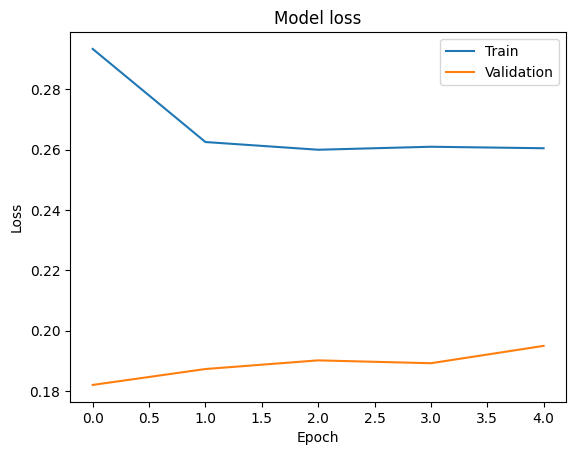

In [167]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [168]:
# Load the best model

from tensorflow.keras.models import load_model

# Load the best model saved during training
best_model = load_model('best_model.h5')

# Use the best model for prediction
y_pred = best_model.predict(X_val)

659/659 [==============================] - 2s 2ms/step


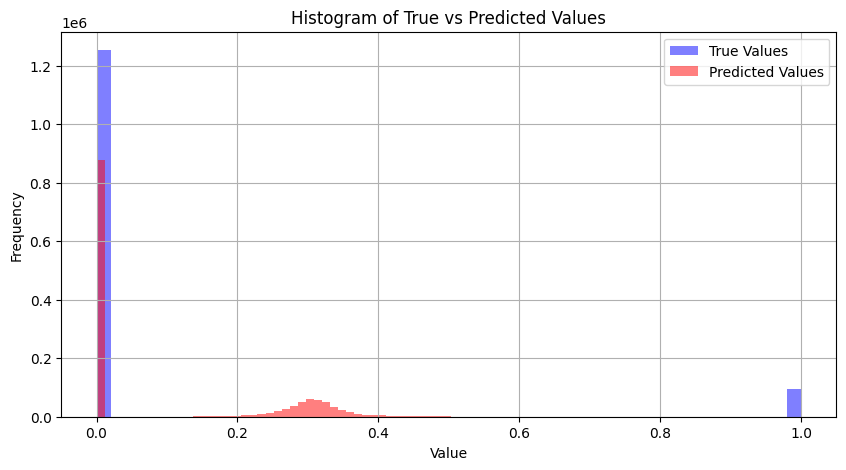

In [169]:
# Look at the Histogram of the predictions / true values
import matplotlib.pyplot as plt

# Flatten the arrays for histogram plotting
y_val_flat = y_val.flatten()
y_pred_flat = y_pred.flatten()

# Plot histograms
plt.figure(figsize=(10, 5))
plt.hist(y_val_flat, bins=50, alpha=0.5, color='blue', label='True Values')
plt.hist(y_pred_flat, bins=50, alpha=0.5, color='red', label='Predicted Values')
plt.title('Histogram of True vs Predicted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [170]:
def round_array_to_threshold(arr, threshold):
    rounded_arr = np.where(arr >= threshold, 1, 0)
    return rounded_arr

In [171]:
threshold = 0.41
rounded_array = round_array_to_threshold(y_pred, threshold)

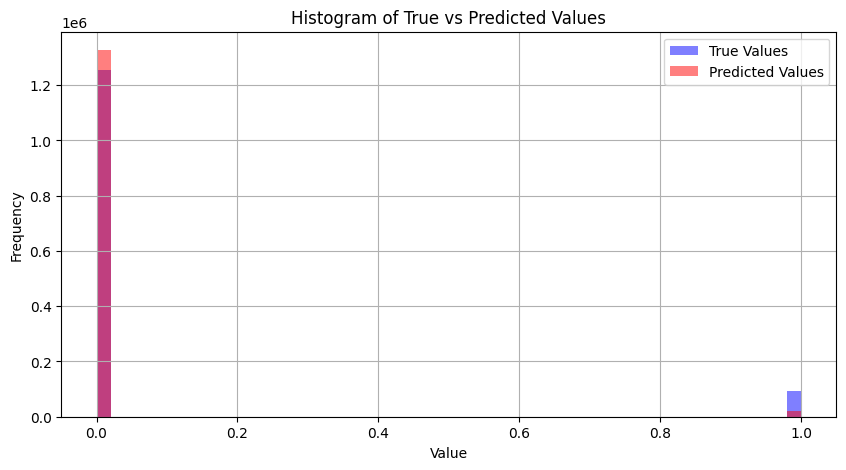

In [172]:

# Flatten the arrays for histogram plotting
y_val_flat = y_val.flatten()
y_pred_flat = rounded_array.flatten()

# Plot histograms
plt.figure(figsize=(10, 5))
plt.hist(y_val_flat, bins=50, alpha=0.5, color='blue', label='True Values')
plt.hist(y_pred_flat, bins=50, alpha=0.5, color='red', label='Predicted Values')
plt.title('Histogram of True vs Predicted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [173]:
y_val.shape

(21060, 8, 8, 1)

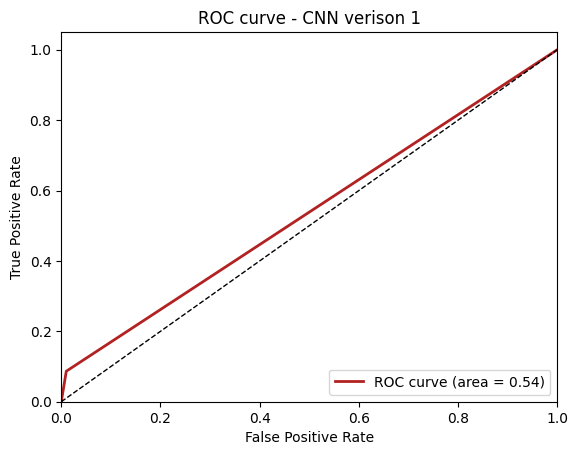

In [174]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_val_flat, y_pred_flat)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='firebrick', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - CNN verison 1')
plt.legend(loc="lower right")
plt.show()

In [175]:
y_pred.shape

(21060, 8, 8, 1)

Test the Model on 2 months of full scale data

In [176]:
# Define paths
images_dir = '/content/months121and128_8x8_ex'

# Function to load and preprocess images
def load_images_test(images_dir, num_vars, i, img_shape=(8, 8)):
    X_test = []
    y_test = []
    for x in range(1,38):
      for y_index in range (1,63):
              target_img_path = os.path.join(images_dir,f'tile{x}_{y_index}_burned_area_sample_{i}.png')

              if os.path.exists(target_img_path):

                    target_img = Image.open(target_img_path).convert('L')  # Convert to grayscale
                    target_img_array = np.array(target_img) / 255.0  # Normalize the pixel values
                    y_test.append(target_img_array)

                  # Load input variable images and stack them
                    stacked_img = np.zeros((img_shape[0], img_shape[1], num_vars), dtype=np.float32)
                    for j in range(num_vars):
                        img_path = os.path.join(images_dir, f'tile{x}_{y_index}_var{j}_sample_{i}.png')  # Adjusting the index
                        if os.path.exists(img_path):
                            img = Image.open(img_path).convert('L')  # Convert to grayscale
                            img_array = np.array(img) / 255.0  # Normalize the pixel values
                            stacked_img[:, :, j] = img_array

                    X_test.append(stacked_img)


    X_test = np.array(X_test)
    y_test = np.array(y_test)

    return X_test, y_test


In [177]:
# Define number of samples and variables
num_vars = 26

# Load images
X_test_121, y_test_121 = load_images_test(images_dir, num_vars, 121, img_shape=(8, 8)) # i = 104

X_test_128, y_test_128 = load_images_test(images_dir, num_vars, 128, img_shape=(8, 8)) # i = 110


In [178]:
X_test_121.shape

(2294, 8, 8, 26)

In [179]:
# Use the best model for prediction
y_pred_121 = best_model.predict(X_test_121)

y_pred_128 = best_model.predict(X_test_128)

72/72 [==============================] - 0s 2ms/step


In [180]:
y_pred_121.shape

(2294, 8, 8, 1)

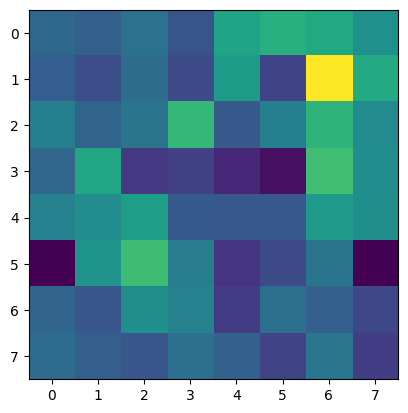

In [181]:
frame=y_pred_121[1,:,:]
frame_val=y_test_121[1,:,:]
plt.imshow(frame,  interpolation='none')

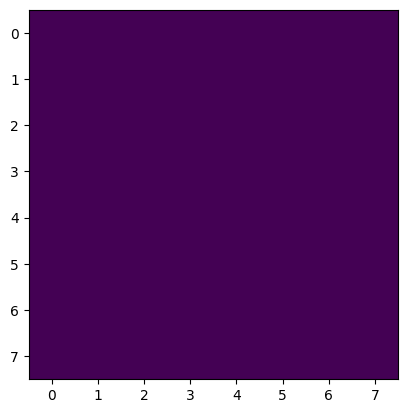

In [182]:
plt.imshow(frame_val, interpolation='none')


In [183]:
y_pred_121.shape

(2294, 8, 8, 1)

In [184]:
def unblockshaped(arr, h, w):
    """
    Return an array of shape (h, w) where
    h * w = arr.size

    If arr is of shape (n, nrows, ncols), n sublocks of shape (nrows, ncols),
    then the returned array preserves the "physical" layout of the sublocks.
    """
    n, nrows, ncols = arr.shape
    return (arr.reshape(h//nrows, -1, nrows, ncols)
               .swapaxes(1,2)
               .reshape(h, w))

In [54]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 39.6 MB/s eta 0:00:00


Text(0.5, 1.0, 'Burned area reanalysis data, 2018-06')

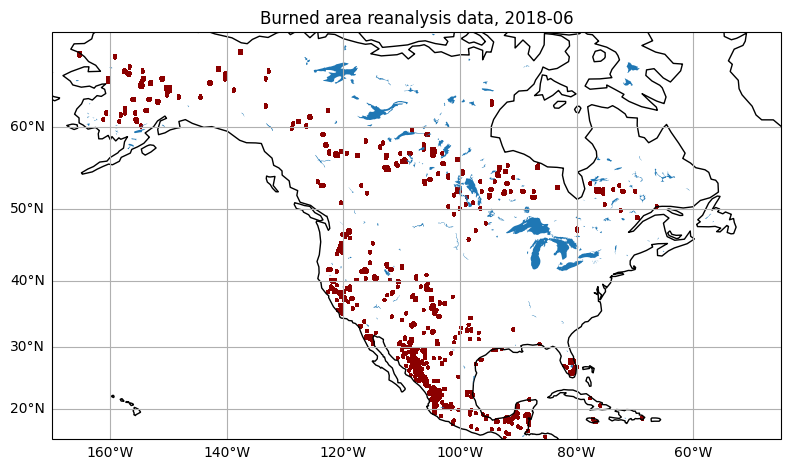

In [185]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.colors as colors
unique_lats = np.linspace(15,88,296)
unique_lons = np.linspace(-168,-45,496)

im_y_121=unblockshaped(y_test_121[:,:,:],296,496)
im_y_121_flipped=np.flipud(im_y_121)


fig = plt.figure(layout='tight')
fig.set_figwidth(10)
cmap_bin = colors.LinearSegmentedColormap.from_list("", ["white", "darkred"], N=2)
cmap_cont = colors.LinearSegmentedColormap.from_list("", ["white", "darkred"], N=10)
crs = ccrs.Miller(central_longitude=-110)#, standard_parallels=(30,55))
ax = plt.axes(projection=crs)
lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m')
# rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_north_america', '10m')

ax.set_extent([-170, -45, 15, 70], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(lakes_50m)
# ax.add_feature(rivers_50m)
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, dms=True, x_inline=False, y_inline=False)
c = plt.contourf(unique_lons, unique_lats, im_y_121_flipped, transform=ccrs.PlateCarree(), cmap=cmap_bin) # Binary plotting
# c = plt.contourf(unique_lons, unique_lats, grid_array, transform=ccrs.PlateCarree(), cmap=cmap_cont, levels=np.linspace(0,1,11)) # Continous plotting
# cb = plt.colorbar(c, location='right', shrink=1) # Use with continuous

plt.title(f'Burned area reanalysis data, 2018-06')
# plt.title(f'Burned area: 2018-06 model prediction pos_weight={pos_weight}')
# plt.title('Burned area: 2019-06 reanalysis data')

Text(0.5, 1.0, 'CNN version 1 2018-06 fire prediction')

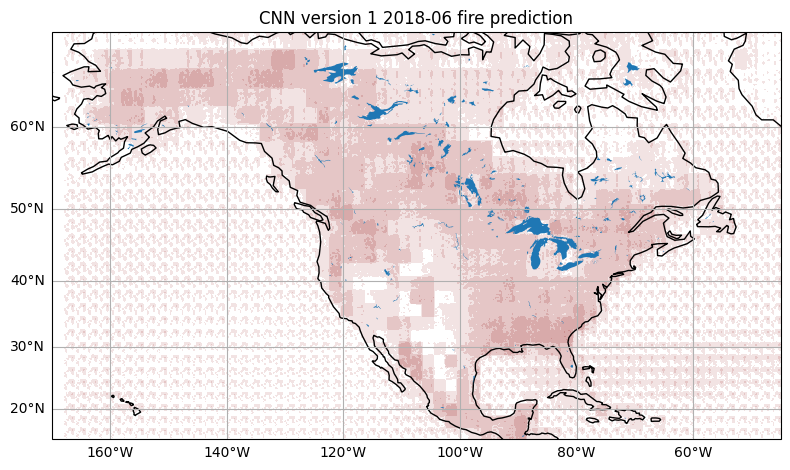

In [186]:
img=unblockshaped(y_pred_121[:,:,:,0],296,496)
im_flipped=np.flipud(img)


fig = plt.figure(layout='tight')
fig.set_figwidth(10)
cmap_bin = colors.LinearSegmentedColormap.from_list("", ["white", "darkred"], N=2)
cmap_cont = colors.LinearSegmentedColormap.from_list("", ["white", "darkred"], N=10)
crs = ccrs.Miller(central_longitude=-110)#, standard_parallels=(30,55))
ax = plt.axes(projection=crs)
lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m')
# rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_north_america', '10m')

ax.set_extent([-170, -45, 15, 70], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(lakes_50m)
# ax.add_feature(rivers_50m)
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, dms=True, x_inline=False, y_inline=False)
#c = plt.contourf(unique_lons, unique_lats, im_flipped, transform=ccrs.PlateCarree(), cmap=cmap_bin) # Binary plotting
c = plt.contourf(unique_lons, unique_lats, im_flipped, transform=ccrs.PlateCarree(), cmap=cmap_cont, levels=np.linspace(0,1,11)) # Continous plotting
# cb = plt.colorbar(c, location='right', shrink=1) # Use with continuous

plt.title(f'CNN version 1 2018-06 fire prediction')
# plt.title(f'Burned area: 2018-06 model prediction pos_weight={pos_weight}')
# plt.title('Burned area: 2019-06 reanalysis data')

Text(0.5, 1.0, 'CNN version 1 2018-06 fire prediction, threshold=0.29')

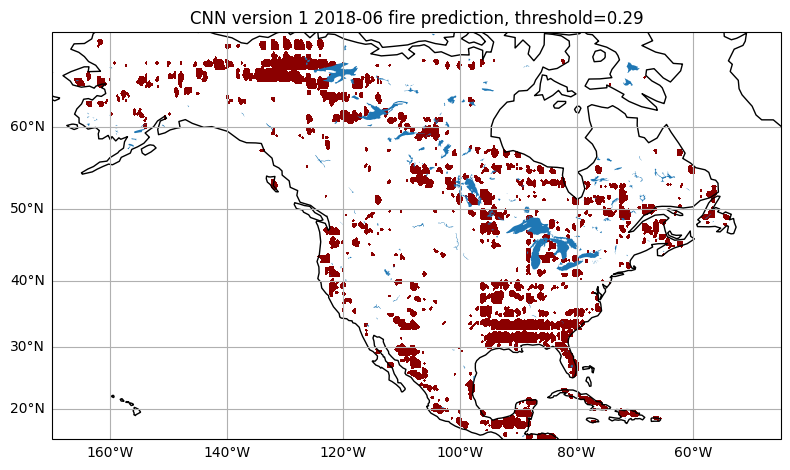

In [97]:
threshold=0.29

y_pred_121_round = round_array_to_threshold(y_pred_121,threshold)

im_pred_121_round =unblockshaped(y_pred_121_round[:,:,:,0],296,496)

im_flipped=np.flipud(im_pred_121_round)


fig = plt.figure(layout='tight')
fig.set_figwidth(10)
cmap_bin = colors.LinearSegmentedColormap.from_list("", ["white", "darkred"], N=2)
cmap_cont = colors.LinearSegmentedColormap.from_list("", ["white", "darkred"], N=10)
crs = ccrs.Miller(central_longitude=-110)#, standard_parallels=(30,55))
ax = plt.axes(projection=crs)
lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m')
# rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_north_america', '10m')

ax.set_extent([-170, -45, 15, 70], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(lakes_50m)
# ax.add_feature(rivers_50m)
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, dms=True, x_inline=False, y_inline=False)
c = plt.contourf(unique_lons, unique_lats, im_flipped, transform=ccrs.PlateCarree(), cmap=cmap_bin) # Binary plotting
# c = plt.contourf(unique_lons, unique_lats, grid_array, transform=ccrs.PlateCarree(), cmap=cmap_cont, levels=np.linspace(0,1,11)) # Continous plotting
# cb = plt.colorbar(c, location='right', shrink=1) # Use with continuous

plt.title(f'CNN version 1 2018-06 fire prediction, threshold=0.29')
# plt.title(f'Burned area: 2018-06 model prediction pos_weight={pos_weight}')
# plt.title('Burned area: 2019-06 reanalysis data')

Text(0.5, 1.0, 'CNN version 1 2019-06 fire prediction')

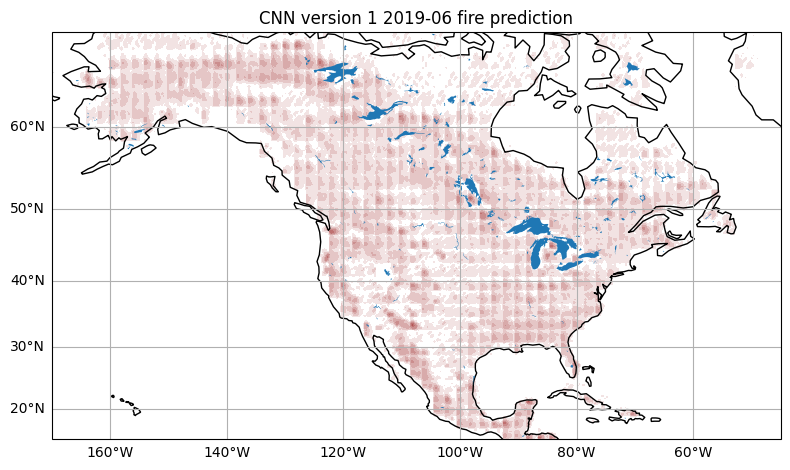

In [114]:
img=unblockshaped(y_pred_128[:,:,:,0],296,496)
im_flipped=np.flipud(img)


fig = plt.figure(layout='tight')
fig.set_figwidth(10)
cmap_bin = colors.LinearSegmentedColormap.from_list("", ["white", "darkred"], N=2)
cmap_cont = colors.LinearSegmentedColormap.from_list("", ["white", "darkred"], N=10)
crs = ccrs.Miller(central_longitude=-110)#, standard_parallels=(30,55))
ax = plt.axes(projection=crs)
lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m')
# rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_north_america', '10m')

ax.set_extent([-170, -45, 15, 70], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(lakes_50m)
# ax.add_feature(rivers_50m)
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, dms=True, x_inline=False, y_inline=False)
#c = plt.contourf(unique_lons, unique_lats, im_flipped, transform=ccrs.PlateCarree(), cmap=cmap_bin) # Binary plotting
c = plt.contourf(unique_lons, unique_lats, im_flipped, transform=ccrs.PlateCarree(), cmap=cmap_cont, levels=np.linspace(0,1,11)) # Continous plotting
# cb = plt.colorbar(c, location='right', shrink=1) # Use with continuous

plt.title(f'CNN version 1 2019-06 fire prediction')
# plt.title(f'Burned area: 2018-06 model prediction pos_weight={pos_weight}')
# plt.title('Burned area: 2019-06 reanalysis data')

Text(0.5, 1.0, 'CNN version 1 2019-06 fire prediction, threshold=0.29')

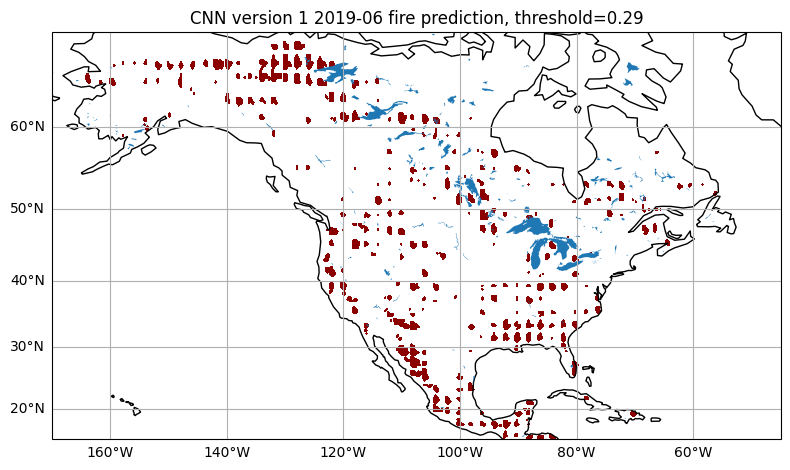

In [116]:
threshold=0.29

y_pred_121_round = round_array_to_threshold(y_pred_128,threshold)

im_pred_121_round =unblockshaped(y_pred_121_round[:,:,:,0],296,496)

im_flipped=np.flipud(im_pred_121_round)


fig = plt.figure(layout='tight')
fig.set_figwidth(10)
cmap_bin = colors.LinearSegmentedColormap.from_list("", ["white", "darkred"], N=2)
cmap_cont = colors.LinearSegmentedColormap.from_list("", ["white", "darkred"], N=10)
crs = ccrs.Miller(central_longitude=-110)#, standard_parallels=(30,55))
ax = plt.axes(projection=crs)
lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m')
# rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_north_america', '10m')

ax.set_extent([-170, -45, 15, 70], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(lakes_50m)
# ax.add_feature(rivers_50m)
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, dms=True, x_inline=False, y_inline=False)
c = plt.contourf(unique_lons, unique_lats, im_flipped, transform=ccrs.PlateCarree(), cmap=cmap_bin) # Binary plotting
# c = plt.contourf(unique_lons, unique_lats, grid_array, transform=ccrs.PlateCarree(), cmap=cmap_cont, levels=np.linspace(0,1,11)) # Continous plotting
# cb = plt.colorbar(c, location='right', shrink=1) # Use with continuous

plt.title(f'CNN version 1 2019-06 fire prediction, threshold=0.29')
# plt.title(f'Burned area: 2018-06 model prediction pos_weight={pos_weight}')
# plt.title('Burned area: 2019-06 reanalysis data')

Text(0.5, 1.0, 'Burned area reanalysis data, 2019-06')

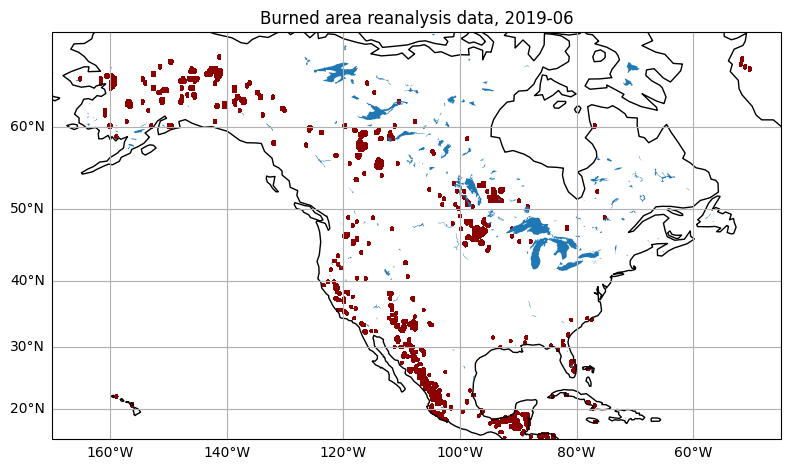

In [115]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.colors as colors
unique_lats = np.linspace(15,88,296)
unique_lons = np.linspace(-168,-45,496)

im_y_121=unblockshaped(y_test_128[:,:,:],296,496)
im_y_121_flipped=np.flipud(im_y_121)


fig = plt.figure(layout='tight')
fig.set_figwidth(10)
cmap_bin = colors.LinearSegmentedColormap.from_list("", ["white", "darkred"], N=2)
cmap_cont = colors.LinearSegmentedColormap.from_list("", ["white", "darkred"], N=10)
crs = ccrs.Miller(central_longitude=-110)#, standard_parallels=(30,55))
ax = plt.axes(projection=crs)
lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m')
# rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_north_america', '10m')

ax.set_extent([-170, -45, 15, 70], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(lakes_50m)
# ax.add_feature(rivers_50m)
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, dms=True, x_inline=False, y_inline=False)
c = plt.contourf(unique_lons, unique_lats, im_y_121_flipped, transform=ccrs.PlateCarree(), cmap=cmap_bin) # Binary plotting
# c = plt.contourf(unique_lons, unique_lats, grid_array, transform=ccrs.PlateCarree(), cmap=cmap_cont, levels=np.linspace(0,1,11)) # Continous plotting
# cb = plt.colorbar(c, location='right', shrink=1) # Use with continuous

plt.title(f'Burned area reanalysis data, 2019-06')
# plt.title(f'Burned area: 2018-06 model prediction pos_weight={pos_weight}')
# plt.title('Burned area: 2019-06 reanalysis data')

In [161]:
diff=y_pred_128_round[:,:,:,0]-y_test_128


In [133]:
!pip install cmocean

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 7.4 MB/s eta 0:00:00


Text(0.5, 1.0, 'difference, 2019-06')

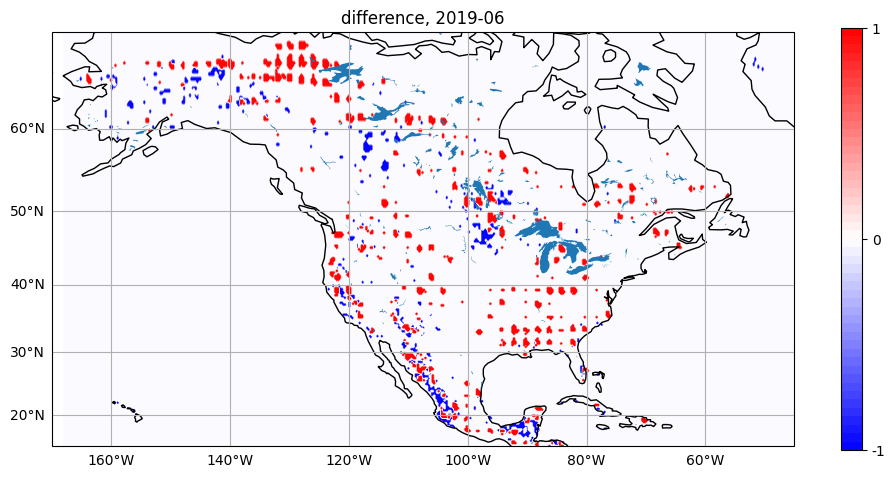

In [162]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from matplotlib.colors import LinearSegmentedColormap
import cmocean

unique_lats = np.linspace(15,88,296)
unique_lons = np.linspace(-168,-45,496)

im_y_121=unblockshaped(diff[:,:,:],296,496)
im_y_121_flipped=np.flipud(im_y_121)


fig = plt.figure(layout='tight')
fig.set_figwidth(10)
cmap_bin = colors.LinearSegmentedColormap.from_list("", ["white", "darkred"], N=2)
cmap_cont = colors.LinearSegmentedColormap.from_list("", ["darkblue", "darkred"], N=10)

colors = [(0, 0, 1), (1, 1, 1),(1, 1, 1), (1, 0, 0)]
cmap_name = 'blue_white_red'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=7)

crs = ccrs.Miller(central_longitude=-110)#, standard_parallels=(30,55))
ax = plt.axes(projection=crs)
lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m')

# rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_north_america', '10m')

ax.set_extent([-170, -45, 15, 70], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(lakes_50m)
# ax.add_feature(rivers_50m)
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, dms=True, x_inline=False, y_inline=False)
#c = plt.contourf(unique_lons, unique_lats, im_y_121_flipped, transform=ccrs.PlateCarree(), cmap=cmap_bin) # Binary plotting
c = plt.contourf(unique_lons, unique_lats, im_y_121_flipped, transform=ccrs.PlateCarree(), cmap='bwr', vmin=-1, vmax=1, levels=np.linspace(-1,1,51)) # Continous plotting
cb = plt.colorbar(c, ax=ax, orientation='vertical', shrink=1)
cb.set_ticks([-1, 0, 1])
cb.set_ticklabels(['-1', '0', '1'])

plt.title(f'difference, 2019-06')
# plt.title(f'Burned area: 2018-06 model prediction pos_weight={pos_weight}')
# plt.title('Burned area: 2019-06 reanalysis data')


In [163]:
diff=y_pred_121_round[:,:,:,0]-y_test_121


Text(0.5, 1.0, 'difference, 2018-06')

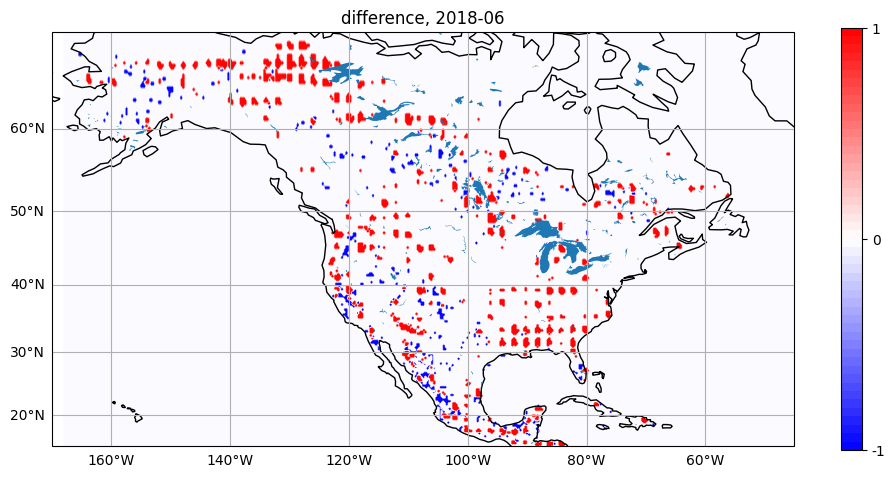

In [164]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from matplotlib.colors import LinearSegmentedColormap
import cmocean

unique_lats = np.linspace(15,88,296)
unique_lons = np.linspace(-168,-45,496)

im_y_121=unblockshaped(diff[:,:,:],296,496)
im_y_121_flipped=np.flipud(im_y_121)


fig = plt.figure(layout='tight')
fig.set_figwidth(10)
cmap_bin = colors.LinearSegmentedColormap.from_list("", ["white", "darkred"], N=2)
cmap_cont = colors.LinearSegmentedColormap.from_list("", ["darkblue", "darkred"], N=10)

colors = [(0, 0, 1), (1, 1, 1),(1, 1, 1), (1, 0, 0)]
cmap_name = 'blue_white_red'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=7)

crs = ccrs.Miller(central_longitude=-110)#, standard_parallels=(30,55))
ax = plt.axes(projection=crs)
lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '50m')

# rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_north_america', '10m')

ax.set_extent([-170, -45, 15, 70], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(lakes_50m)
# ax.add_feature(rivers_50m)
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, dms=True, x_inline=False, y_inline=False)
#c = plt.contourf(unique_lons, unique_lats, im_y_121_flipped, transform=ccrs.PlateCarree(), cmap=cmap_bin) # Binary plotting
c = plt.contourf(unique_lons, unique_lats, im_y_121_flipped, transform=ccrs.PlateCarree(), cmap='bwr', vmin=-1, vmax=1, levels=np.linspace(-1,1,51)) # Continous plotting
cb = plt.colorbar(c, ax=ax, orientation='vertical', shrink=1)
cb.set_ticks([-1, 0, 1])
cb.set_ticklabels(['-1', '0', '1'])

plt.title(f'difference, 2018-06')
# plt.title(f'Burned area: 2018-06 model prediction pos_weight={pos_weight}')
# plt.title('Burned area: 2019-06 reanalysis data')
